In [1]:
# Imports 
import matplotlib
# %matplotlib inline

In [2]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [3]:
# Load the image
image = mpimg.imread("../images/test.jpg")

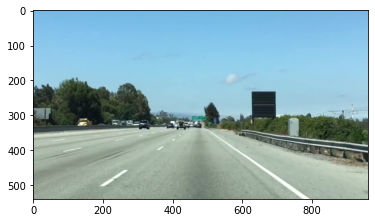

In [4]:
# Show the loaded image
plt.imshow(image)
plt.show()

In [5]:
# pull out x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

region_select = np.copy(image)
color_select = np.copy(image)
line_image = np.copy(image)

In [6]:
ysize, xsize

(540, 960)

In [7]:
# define the colour selection critiria
red_threshold = 200
green_threshold = 200
blue_threashold = 200

rgb_threashold = [red_threshold, green_threshold, blue_threashold]

In [8]:
# define triangular region of interest
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

In [9]:
# fit lines (y = Ax+B) to identify the 3 sided region of interest
fit_left = np.polyfit((left_bottom[0], apex[0]),(left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]),1)

In [10]:
# pixels below the thresholds
color_thresholds = (image[:,:,0] < rgb_threashold[0]) \
            | (image[:,:,1] < rgb_threashold[1]) \
            | (image[:,:,2] < rgb_threashold[2])


In [11]:
# find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

region_threasholds = (YY > (XX* fit_left[0] + fit_left[1])) &\
                     (YY > (XX*fit_right[0] + fit_right[1])) & \
                     (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [12]:
# color pixels red, which are inside the region of interest
color_select[color_thresholds | ~region_threasholds] = [0, 0,0]

In [13]:
line_image[~color_thresholds & region_threasholds] = [255,0,0]

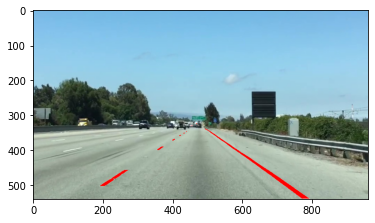

In [14]:
# plt.imshow(image)
# x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
# y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
# plt.plot(x, y, 'b--', lw=4)
# plt.imshow(color_select)
plt.imshow(line_image)
plt.show()opencv-python